# Imports and dataset loading

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math
from sklearn.multioutput import MultiOutputRegressor
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.neural_network import MLPRegressor
from sklearn.svm import SVR
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasRegressor
from lazypredict.Supervised import LazyRegressor
from sklearn.model_selection import train_test_split
import autokeras as ak
import tensorflow as tf
import pandas as pd

strategyArray = []
gainArray     = []
lossArray     = []
datasetQnt    = 2
ampNumber     = [4, 2]

originalDataset = []
binaryDataset   = []

gainScalerList = []
lossScalerList = []

originalDataset.append(pd.read_csv('../dataset.txt', sep = ',',header = None))
originalDataset.append(pd.read_csv('dataset-{}.txt'.format(ampNumber[-1]), sep = ',', header = None))
        
for i in range(datasetQnt):
    binaryDataset.append([])
    
    for line in originalDataset[i].values:
        myList = [1 if j != 0 else 0 for j in line[:40]]
        myList.extend(line[40:])
        binaryDataset[i].append(myList)
    
    binaryDataset[i] = pd.DataFrame(binaryDataset[i])

def loadDataset(datasetIndex): 
    dataset = binaryDataset[datasetIndex].values[:, :40]
    
    for i in range(0, ampNumber[datasetIndex] * 2, 2):
        gain    = np.array(binaryDataset[datasetIndex].values[:, 40 + i])
        #gain    = gainScaler.transform(gain.reshape(-1, 1))
        gain    = gain.reshape(-1, 1)
        dataset = np.hstack((dataset, gain))
        
        loss    = np.array(binaryDataset[datasetIndex].values[:, 40 + i + 1])
        #loss    = lossScaler.transform(loss.reshape(-1, 1))
        loss    = loss.reshape(-1, 1)
        dataset = np.hstack((dataset, loss))
                
    X, y = np.array(dataset[:, :40]), np.array(dataset[:, 40:])
    return X, y

/home/leandro/Documentos/Mestrado/ACOPResults/acopEnv/lib/python3.6/site-packages/sklearn/utils/deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


# Model setup

In [2]:
summaryList = []

#1 regressor per link
X, y = loadDataset(0)
reg  = LazyRegressor(verbose = 0, ignore_warnings = False)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)
models, summary                  = reg.fit(X_train, X_test, y_train, y_test)

summaryList.append(summary)

#1 regressor per amplifier
X, y = loadDataset(1)

for j in range(0, ampNumber[-1] * 2, 2):
    reg = LazyRegressor(verbose = 0, ignore_warnings = False)

    X_train, X_test, y_train, y_test = train_test_split(X, y[:, j: j + 2], test_size = 0.3, random_state = 0)
    models, summary                  = reg.fit(X_train, X_test, y_train, y_test)
    
    summaryList.append(summary)

 14%|█▍        | 6/43 [00:00<00:00, 50.50it/s]

AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 21%|██        | 9/43 [00:00<00:01, 22.91it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.


 37%|███▋      | 16/43 [00:01<00:02, 11.50it/s]

GeneralizedLinearRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.


 56%|█████▌    | 24/43 [00:01<00:01, 12.95it/s]

LarsCV model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.


 63%|██████▎   | 27/43 [00:04<00:05,  2.72it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.


  0%|          | 0/43 [00:00<?, ?it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
XGBRegressor model failed to execute
only size-1 arrays can be converted to Python scalars
LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (1769, 8) instead.
AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 21%|██        | 9/43 [00:00<00:01, 32.17it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV
GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 49%|████▉     | 21/43 [00:00<00:00, 39.01it/s]

GeneralizedLinearRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LarsCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 72%|███████▏  | 31/43 [00:01<00:00, 15.71it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 95%|█████████▌| 41/43 [00:02<00:00, 15.63it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
XGBRegressor model failed to execute
only size-1 arrays can be converted to Python scalars


  9%|▉         | 4/43 [00:00<00:01, 35.35it/s]

LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
AdaBoostRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
BayesianRidge model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 19%|█▊        | 8/43 [00:00<00:01, 34.92it/s]

ElasticNetCV model failed to execute
For multi-task outputs, use MultiTaskElasticNetCV


 37%|███▋      | 16/43 [00:00<00:01, 25.62it/s]

GammaRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
GeneralizedLinearRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
GradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
HistGradientBoostingRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
HuberRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LarsCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 47%|████▋     | 20/43 [00:00<00:00, 28.42it/s]

LassoCV model failed to execute
For multi-task outputs, use MultiTaskLassoCV
LassoLarsCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LassoLarsIC model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
LinearSVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


 63%|██████▎   | 27/43 [00:01<00:00, 16.27it/s]

NuSVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
OrthogonalMatchingPursuitCV model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
PassiveAggressiveRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
PoissonRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


100%|██████████| 43/43 [00:01<00:00, 22.38it/s]

SGDRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
SVR model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
StackingRegressor model failed to execute
__init__() missing 1 required positional argument: 'estimators'
TweedieRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.
XGBRegressor model failed to execute
only size-1 arrays can be converted to Python scalars
LGBMRegressor model failed to execute
y should be a 1d array, got an array of shape (441, 2) instead.


In [3]:
for summary in summaryList:
    print(summary['RMSE'].index[0]) #best regressor
    print(summary['RMSE'][0]) #best RMSE
    print()

BaggingRegressor
5.239730541170139

TransformedTargetRegressor
2.435851335562301

Lars
1.626331633740409



In [4]:
def prepTable():
    rows    = ["One regressor / link"]
    columns = ("Best strategy", "Best RMSE")

    for i in range(ampNumber[-1]):
        rows.append("Amp {} RMSE".format(i + 1))

    rows.append("Mean RMSE ({} amps)".format(ampNumber[-1]))

    data = []

    for summary in summaryList:
        data.append([summary['RMSE'].index[0], summary['RMSE'][0]])

    total = 0

    for i in range(1, ampNumber[-1] + 1):

        total += data[i][1]

    data.append(["", total / ampNumber[-1]])

    return rows, columns, data

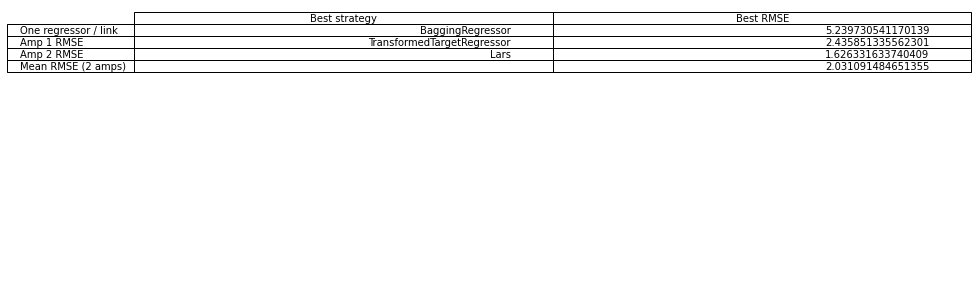

In [5]:
rows, columns, data = prepTable()

fig = plt.figure(figsize = (15, 5))
ax = fig.add_subplot()
ax.axis("off")

ax.table(cellText  = data,
         rowLabels = rows,
         colLabels = columns, loc="upper center")
